# PyTorch computer vision

### Computer vision libaries in PyTorch
1. torchvision - base domain for pytorch comp vis
2. torchvision.datasets - get dataset and loading functions for cnn
3. torchvision.models - get pretrained cnn models
4. torchvision.transforms - function for manupulating you vision data
5. torch.utils.data.Dataset - Base dataset class for pytorch
6. torch.untils.data.DataLoder - create a python iterable over a dataset

In [1]:
# import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt



# check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0.dev20240218+cu121
0.18.0.dev20240218+cu121


### Getting a dataset

In [2]:
# setting up training data
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)


test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
## see the first training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
#check the shape of our image
print(f'Image shape: {image.shape} [color_channels,hight,width]')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) [color_channels,hight,width]
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


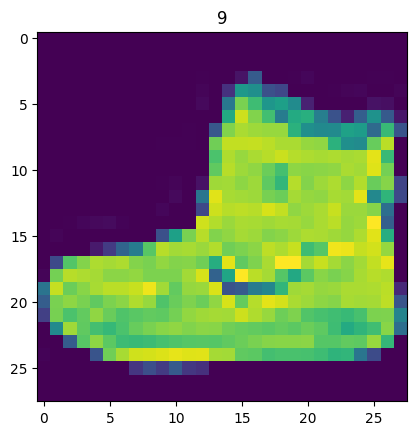

In [9]:
# visualize our data
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f'Image shape: {image.shape}')
plt.title(label);
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

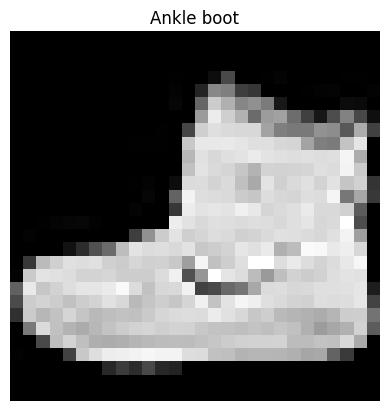

In [10]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label]);
plt.axis(False)

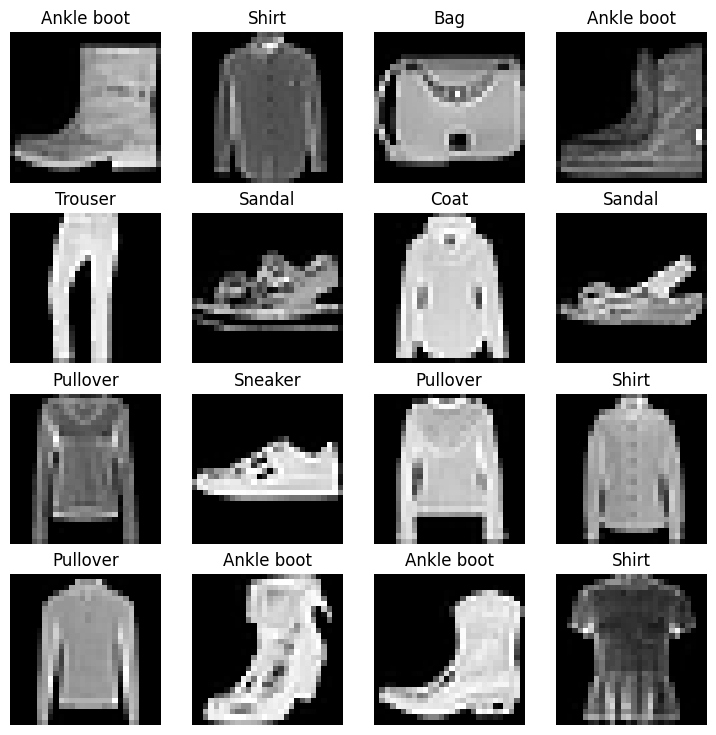

In [11]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [12]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Prepare data loader


In [13]:
from torch.utils.data import DataLoader


# setup the batch size hyper parameter
BATCH_SIZE = 32


# turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f25cfb2f400>,
 <torch.utils.data.dataloader.DataLoader at 0x7f25cf94e260>)

In [14]:
# lets check what we created
print(f'DataLoader: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader:{len(train_dataloader)} batches of { BATCH_SIZE}..')
print(f'Length of test_dataloader:{len(test_dataloader)} batches of { BATCH_SIZE}..')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7f25cfb2f400>, <torch.utils.data.dataloader.DataLoader object at 0x7f25cf94e260>)
Length of train_dataloader:1875 batches of 32..
Length of test_dataloader:313 batches of 32..


In [15]:
10000/32

312.5

In [16]:
# check out what's inside the training dataloader
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size :torch.Size([1, 28, 28])
Label: 8,label size: torch.Size([])


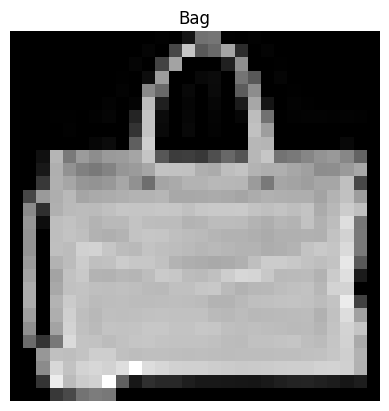

In [17]:
# show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size :{img.shape}')
print(f'Label: {label},label size: {label.shape}')

### Model_0: build a baseline model

In [18]:
# Create a flatten layer

flatten_model = nn.Flatten()

#get a single sample
X = train_features_batch[0]

#flatten the sample
output = flatten_model(X)

# print out what happend
print(f'Shape before flattening: {X.shape}')
print(f'Shape after flattening: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [19]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [20]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,X):
    return self.layer_stack(X)

In [21]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,# this is 28*28
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setup loss and optimizer

In [24]:
import requests
from pathlib import Path

# Download helper function from Learn pytorch repo
if Path('helper_functions.py').is_file():
    print('helper_function.py already exists, skipping download')
else:
    print('Downloading helper_function.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_function.py','wb') as f:
        f.write(request.content)

In [25]:
# Importing accuracy metric
from helper_function import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [26]:
## create a function to time our experiments
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

In [27]:
start_time = timer()

# some code
end_time = timer()
print_train_time(start=start_time,end=end_time,device='cpu')

Train time on cpu: 0.000 seconds


1.1052999980165623e-05

In [28]:
# import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs=3

#create training and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch:{epoch}\n------')

    #### Training
    train_loss = 0

    ## add a loop to loop through the training batches
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()

        #forward pass
        y_pred = model_0(X)

        # calculate the loss
        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulate the train loss

        # optimizer zero grad
        optimizer.zero_grad()

        #loss  backward (backpropagation)
        loss.backward()

        # optimizer step
        optimizer.step()

        # print out what's happening
        if batch % 400 == 0:
            print(f'Looked at {batch * len(X) / len(train_dataloader.dataset)} samples')

    # divide total train loss by length by length of train_dataloader
    train_loss /= len(train_dataloader)

    ### testing
    test_loss,test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            # forward pass
            test_pred = model_0(X_test)

            # calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred,y_test)

            # calculate the accuracy
            test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

        # calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

#calculate the train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
Looked at 0.0 samples
Looked at 0.21333333333333335 samples
Looked at 0.4266666666666667 samples
Looked at 0.64 samples
Looked at 0.8533333333333334 samples

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch:1
------
Looked at 0.0 samples
Looked at 0.21333333333333335 samples
Looked at 0.4266666666666667 samples
Looked at 0.64 samples
Looked at 0.8533333333333334 samples

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch:2
------
Looked at 0.0 samples
Looked at 0.21333333333333335 samples
Looked at 0.4266666666666667 samples
Looked at 0.64 samples
Looked at 0.8533333333333334 samples

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 10.722 seconds


### Make Predicitions and get model_0 results

In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
    """ Returns a dictionary containing the results of model predictiong on data_loader"""
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # make predicitions
            y_pred = model(X)

            # accumulate the loss and acc values per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # scale loss and acc to find the average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name':model.__class__.__name__,# only works when model was created with class
            'model_loss':loss.item(),
            'model_acc':acc}


# calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [30]:
## device agnostic-code
device= 'cuda' if torch.cuda.is_available else "cpu"
device

'cuda'

In [31]:
!nvidia-smi

Wed Feb 28 23:21:24 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.10              Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   48C    P5              9W /  105W |     682MiB /   8188MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [32]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            # nn.Linear(in_features=hidden_units,out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,X: torch.Tensor):
        return self.layer_stack(X)

In [33]:
# create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [34]:
## setup loss and evaluation
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Functionizing training and testing loop
* training loop - train_step()
* testing loop - test_step()

In [35]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

    train_loss ,train_acc = 0,0

    # put model on training mode
    model.train()

    ## add a loop to loop through the training batches
    for batch,(X,y) in enumerate(train_dataloader):
        # put data on target device
        X,y = X.to(device),y.to(device)

        #forward pass (outputs are the raw logits from model)
        y_pred = model(X)

        # calculate the loss and accuracy (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulate the train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # optimizer zero grad
        optimizer.zero_grad()

        #loss  backward (backpropagation)
        loss.backward()

        # optimizer step
        optimizer.step()

    # divide total train loss and accuracy by length by length of train_dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    # print out what's happening
    print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc}')

In [36]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over data loader"""
    test_loss,test_acc = 0,0


    # put the model on eval mode
    model.eval()

    # turn on inference mode context manager
    with torch.inference_mode():
        for X,y in data_loader:
            # send the data on target data
            X,y = X.to(device),y.to(device)

            # forward pass
            test_pred = model(X)

            # calculate the loss/acc
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))

        # adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test Loss:{test_loss:.5f} | Test acc: {test_acc:.2f}%\n')

In [37]:
torch.manual_seed(42)

# measure time

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# set epochs
epochs = 3

# create a optimization and evaluation loop using train_step(), test_step()
for epoch in tqdm(range(epochs)):
    print(f'Epoch:{epoch}\n-----------')
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn= loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device=device)

    test_step(model=model_1,
               data_loader=test_dataloader,
               loss_fn= loss_fn,
               accuracy_fn = accuracy_fn,
               device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-----------
Train loss: 1.09199 | Train acc: 61.343333333333334
Test Loss:0.95636 | Test acc: 65.00%

Epoch:1
-----------
Train loss: 0.78101 | Train acc: 71.92833333333333
Test Loss:0.72227 | Test acc: 73.91%

Epoch:2
-----------
Train loss: 0.67027 | Train acc: 75.93666666666667
Test Loss:0.68500 | Test acc: 75.02%

Train time on cuda: 13.220 seconds


In [38]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [39]:
total_train_time_model_0

10.721858905000033

In [44]:
# get model 1 results dict
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
    """ Returns a dictionary containing the results of model predictiong on data_loader"""
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # make our data device agnostic 
            X,y = X.to(device),y.to(device)
            # make predicitions
            y_pred = model(X)

            # accumulate the loss and acc values per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # scale loss and acc to find the average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name':model.__class__.__name__,# only works when model was created with class
            'model_loss':loss.item(),
            'model_acc':acc}


# calculate model_0 results on test dataset
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [45]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

### Building a convolutional neural network

In [108]:
# create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # there is a trick to calculate this
                     out_features=output_shape)
        )

    def forward(self,X):
        X = self.conv_block_1(X)
        # print(X.shape)
        X = self.conv_block_2(X)
        # print(X.shape)
        X = self.classifier(X)
        # print(X.shape)
        return X   

In [109]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape= len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [110]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [111]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Stepping through nn.Conv2d()


In [112]:
torch.manual_seed(42)

#create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single Image shape: {test_image.shape}')
print(f'Test image :\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single Image shape: torch.Size([3, 64, 64])
Test image :
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [113]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=(3,3),
                      stride=1,
                      padding=0)

# pass the data though the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191, -

### Stepping through nn.MaxPool2d()

In [114]:
test_image.shape

torch.Size([3, 64, 64])

In [115]:
# print out original image shape without unsqueezed dim
print(f'Test image original shape: {test_image.shape}')
print(f'Test image original shape: {test_image.unsqueeze(0).shape}')

# Create a sample nn.MaxPool2d layer
max_pool_layer =  nn.MaxPool2d(kernel_size=2)

# pass data through just the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'Shape after going through conv_layer(): {test_image_through_conv.shape}')

# pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through max_pool_layer(): {test_image_through_conv_and_max_pool.shape}')

Test image original shape: torch.Size([3, 64, 64])
Test image original shape: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through max_pool_layer(): torch.Size([1, 10, 31, 31])


In [116]:
torch.manual_seed(42)
#create a random tensor with a similar number of dimension to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f'Random tensor shape : {random_tensor.shape}')
# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMaxPool tensor:\n {max_pool_tensor}')
print(f'MaxPool tensor shape:{max_pool_tensor.shape}')
random_tensor


Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape : torch.Size([1, 1, 2, 2])

MaxPool tensor:
 tensor([[[[0.3367]]]])
MaxPool tensor shape:torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

### setup a loss function and opimizer for model_2

In [117]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [118]:
model_2.state_dict

<bound method Module.state_dict of FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>

### Training and testing 

In [119]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device = device)
    test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.60890 | Train acc: 77.83666666666667
Test Loss:0.42263 | Test acc: 85.26%

Epoch: 1
------
Train loss: 0.36493 | Train acc: 86.93166666666667
Test Loss:0.34917 | Test acc: 87.43%

Epoch: 2
------
Train loss: 0.32719 | Train acc: 88.20833333333333
Test Loss:0.32844 | Test acc: 88.05%

Train time on cuda: 30.725 seconds


In [121]:
# get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.328441858291626,
 'model_acc': 88.0491214057508}

In [122]:
### Compare model results and traing time
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results,])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.328442,88.049121


In [123]:
## add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,10.721859
1,FashionMNISTModelV1,0.685001,75.019968,13.220363
2,FashionMNISTModelV2,0.328442,88.049121,30.724532


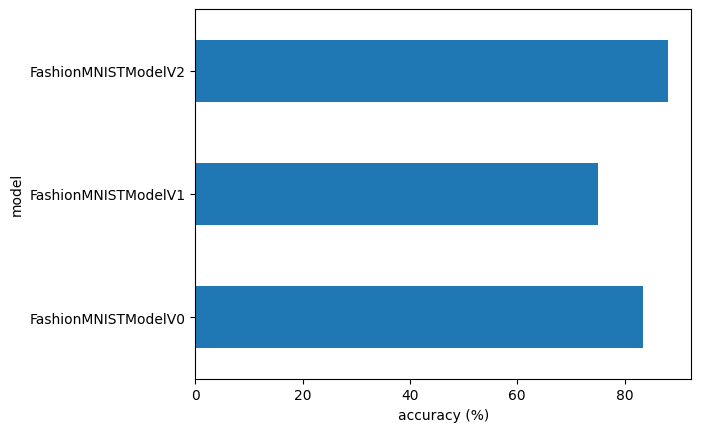

In [125]:
### visuallize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model');

### Make and evaluate random prediction with best model

In [132]:
def make_prediction(model:torch.nn.Module,
                   data:list,
                   device:torch.device= device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample
            sample = torch.unsqueeze(sample,dim=0).to(device)

            # forward pass
            pred_logit = model(sample)

            # get prediction probability (logit -> pred prob)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

            # get pred prob off the gpu for further calculation
            pred_probs.append(pred_prob.cpu())
        
        # Stack the pred_probs to turn list into a tensor
        return torch.stack(pred_probs)   

In [149]:
img,label = test_data[0][:10]
img.shape,label

(torch.Size([1, 28, 28]), 9)

In [155]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

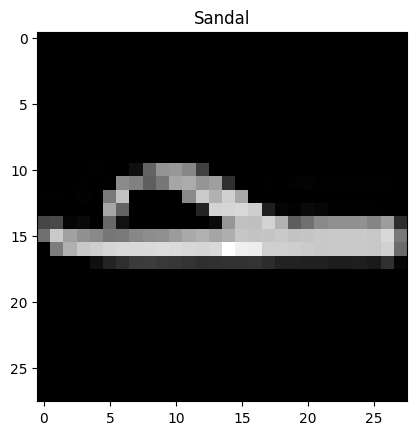

In [156]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [157]:
# make predicition
pred_probs =  make_prediction(model=model_2,
                             data=test_samples)

# view first two prediction prob
pred_probs[:2]

tensor([[3.3302e-05, 8.8141e-07, 2.0048e-05, 4.6982e-04, 4.9225e-07, 9.9727e-01,
         3.8090e-06, 8.2169e-04, 1.3746e-03, 4.1740e-06],
        [9.7356e-02, 1.8941e-03, 4.8495e-01, 9.6030e-03, 4.9382e-03, 1.7761e-04,
         3.9704e-01, 3.1516e-04, 3.3716e-03, 3.5629e-04]])

In [158]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 2, 0, 1, 2, 2, 1, 4, 4])

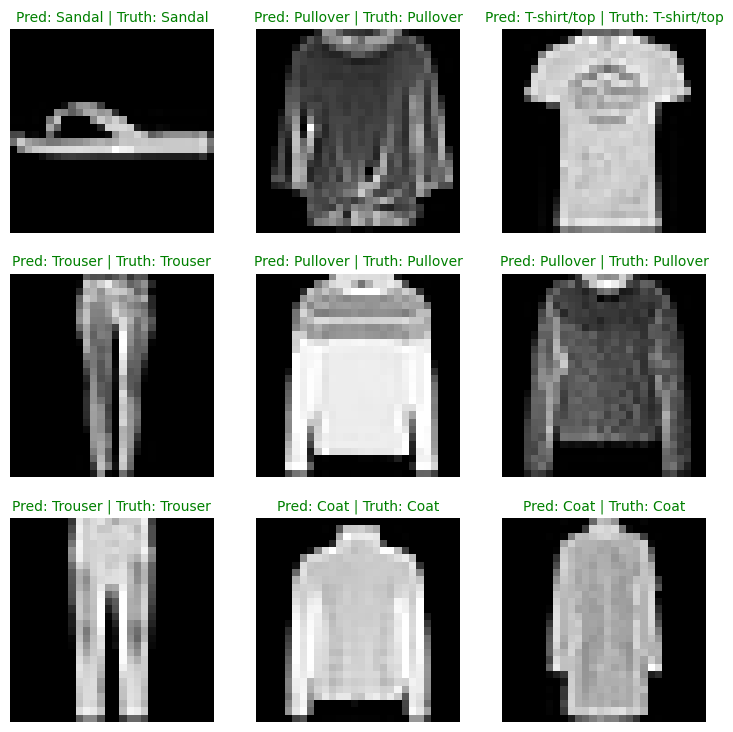

In [159]:
# plot predicitions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(nrows,ncols,i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(),cmap='gray')

    # Find the prediction 
    pred_label = class_names[pred_classes[i]]

    # get the truth label
    truth_label = class_names[test_labels[i]]

    # create a title for the plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    # check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text,fontsize=10,c='g') # greeen text if prediction same as truth

    else:
        plt.title(title_text,fontsize=10,c='r')

    plt.axis(False)

### Making a confusion matrix for further predicition evaluation

In [166]:
# Import tqdm.auta
from tqdm.auto import tqdm


# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc='Makeing predictions....'):
        # send the data and target to target device
        X,y = X.to(device),y.to(device)
        # do the forward pass
        y_logit = model_2(X)
        # turn predicitions from logits
        y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        # Put prediction to CPU for evaluation
        y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)   
y_pred_tensor[:10]

Makeing predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 4, 4, 6, 5, 7])

In [167]:
len(y_pred_tensor)

10000

In [168]:
import mlxtend

In [169]:
mlxtend.__version__

'0.23.1'

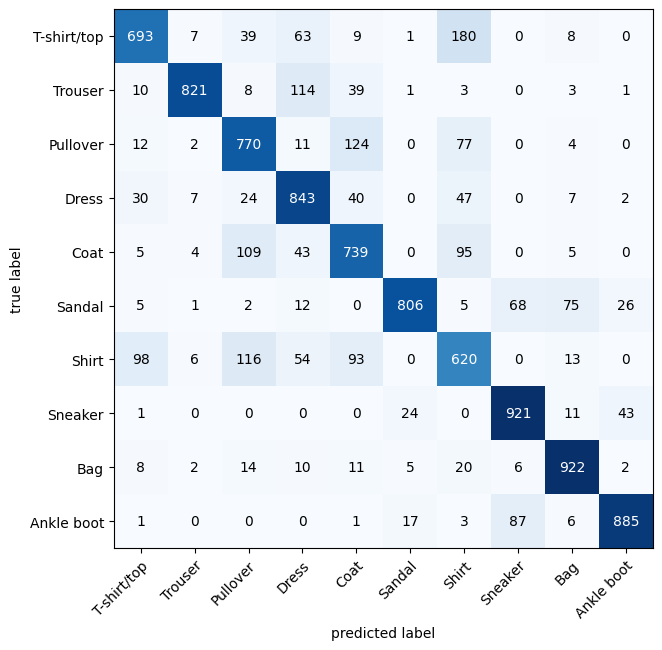

In [175]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confucsion instance and compare prediction to target
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# plot the confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [174]:
confmat_tensor

tensor([[693,   7,  39,  63,   9,   1, 180,   0,   8,   0],
        [ 10, 821,   8, 114,  39,   1,   3,   0,   3,   1],
        [ 12,   2, 770,  11, 124,   0,  77,   0,   4,   0],
        [ 30,   7,  24, 843,  40,   0,  47,   0,   7,   2],
        [  5,   4, 109,  43, 739,   0,  95,   0,   5,   0],
        [  5,   1,   2,  12,   0, 806,   5,  68,  75,  26],
        [ 98,   6, 116,  54,  93,   0, 620,   0,  13,   0],
        [  1,   0,   0,   0,   0,  24,   0, 921,  11,  43],
        [  8,   2,  14,  10,  11,   5,  20,   6, 922,   2],
        [  1,   0,   0,   0,   1,  17,   3,  87,   6, 885]])

### Saving and loading best performing model

In [178]:
from pathlib import Path

#create model dictory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                exist_ok=True)

# create model save
MODEL_NAME = 'Computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# SAVE THE MODEL STATE DICT
print(f'Saving Model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving Model to: models/Computer_vision_model_2.pth
